
<div style="display: flex; text-align:center; background-color: RGB( 254, 249, 231 );border: 1px solid RGB(51,165,182);" >
<h1 style="margin: auto; padding: 30px;margin-left: 2em; text-indent: -2em">Projet 6 -Analysez les ventes d'une librairie avec R ou Python<br>
      2eme partie- Analyses
</h1>
</div>

<div style="border-style: double;border-width: 5px;border-color: RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em"><a id="100">SOMMAIRE</a> </h3>
   
  - 1. **[LES DONNEES](#1)**
     - 1. [base de données Clients](#11)
          - 1. _[description generale](#111)_
          
     - 2. [Les Produits](#12)
          - 1. _[proportions de produits par categorie](#121)_
          - 2. _[description generale des prix de produits ](#122)_
          - 3. _[description des prix par categorie de produits](#123)_ 
  
  - 2. **[ANALYSES DES VENTES](#2)**
     - 1. [Chiffre d affaire sur la periode d'exercice ](#21)
     - 2. [proportions de vente par categorie de produits](#22)
     - 3. [description des prix de produits vendus sur la periode d exercice](#23)
          - 1. _[description generale](#231)_
          - 2. _[description des prix de panier moyen ](#232)_
          - 3. _[meilleure journée de vente par chiffre d affaire ,meilleur produit](#233)_
          - 4. _[concentration des ventes par prix de produits (indice de gini et courbe de lorentz)](#234)_

      - 4. [clients actifs](#24)
          - 1. _[description generale des ages des clients et sexe(describ)(pyramide des ages)](#241)_
          - 2. _[meilleurs clients sur la periode d exercice](#242)_
          - 3. _[les clients inactifs sur la periode](#243)_
          - 4. _[concentration des ventes par des clients (indice de gini et courbe de lorentz)](#244)_
          
      


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em">0.0 - Importation les librairies et declaration de fonctions</h3>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import statsmodels.api as sm
pd.set_option('display.max_rows', None)


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px;margin-left: 4.5em; text-indent: -4.5em" ><a a id="1">1 - LES DONNEES</a></h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em"><a id="11">A - Base de données clients</a></h3>
</div>

In [2]:
customers_clean = pd.read_csv("./DATA/cleaned/customers_clean.csv")
customers_clean.head()

,client_id,sex,birth,age,s_idclient
0,c_4410,f,1967.0,55.0,c
1,c_7839,f,1975.0,47.0,c
2,c_1699,f,1984.0,38.0,c
3,c_5961,f,1962.0,60.0,c
4,c_5320,m,1943.0,79.0,c


#### <a id="111">1- A- a - Description generale</a>

In [3]:
Describ_customers_age = customers_clean.describe().drop(["birth"],axis=1)
Describ_customers_age

,age
count,8621.000000
mean,43.724394
std,16.917958
min,18.000000
25%,30.000000
50%,43.000000
75%,56.000000
max,93.000000


In [4]:
Describ_customers_sex = pd.DataFrame(customers_clean.sex.describe())
Describ_customers_sex

,sex
count,8621
unique,2
top,f
freq,4490


In [5]:
Describ_customers_sex.loc["freq",:]/Describ_customers_sex.loc["count",:]

sex    0.520821
dtype: object

<div class="alert alert-block alert-info">
 <br>La base de données clients compte 8621 clients.La parité Homme/Femme est presque parfaite avec 52% de femmes et 48% d'hommes</br>
<br>La moyenne d'age est de 43 ans .</br>
<br>Notre plus jeune client est agé de 18 ans tandis que le plus agé a 93 ans.</br>
</div>


In [6]:
customers_clean.head()

,client_id,sex,birth,age,s_idclient
0,c_4410,f,1967.0,55.0,c
1,c_7839,f,1975.0,47.0,c
2,c_1699,f,1984.0,38.0,c
3,c_5961,f,1962.0,60.0,c
4,c_5320,m,1943.0,79.0,c


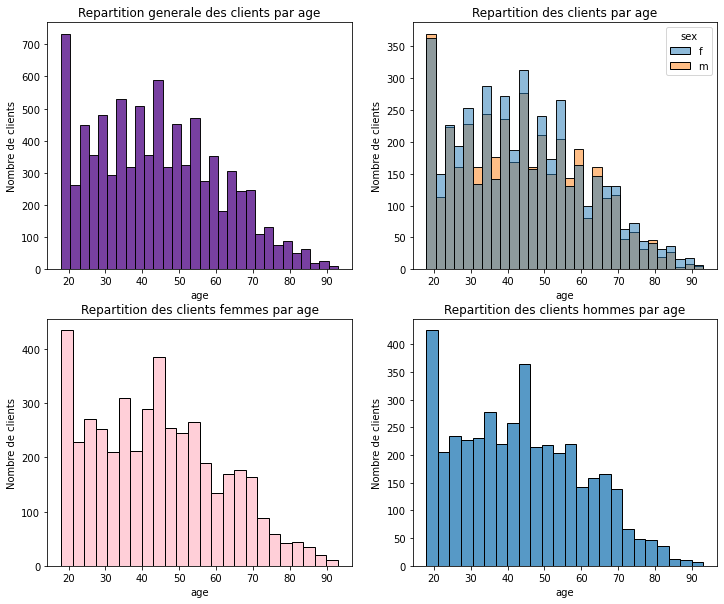

In [7]:
fig = plt.figure(figsize=(12,10))
plt.subplot(2,2,2)
l = sns.histplot(data=customers_clean, x="age", hue="sex")
l.set(ylabel="Nombre de clients",title='Repartition des clients par age')

plt.subplot(2,2,3)
g = sns.histplot(data=customers_clean.loc[customers_clean.sex=='f',:], x="age",color='pink')
g.set(ylabel="Nombre de clients",title='Repartition des clients femmes par age')

plt.subplot(2,2,4)
h = sns.histplot(data=customers_clean.loc[customers_clean.sex=='m',:], x="age")
h.set(ylabel="Nombre de clients",title='Repartition des clients hommes par age')

plt.subplot(2,2,1)
i = sns.histplot(data=customers_clean, x="age",color="indigo")
i.set(ylabel="Nombre de clients",title='Repartition generale des clients par age')

plt.show()

fig.savefig('./GRAPHIQUES/analyse_generale/repartition_generale_des_clients_bdd.png',dpi=fig.dpi*10)
plt.close(fig)

<div class="alert alert-block alert-info">
 <br>Cet histogramme nous presente la repartition des clients par age et par sexe</br>
<br>Nous pouvons constater que nous avons la meme forme de distribution homme et femme .</br>
<br>Le nombre très important des clients de 18 ans laisse entrevoir un nombre biesé de cette categorie de clients .</br>
</div>


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em"><a id="12">B- Les produits</a></h3>
</div>

#### <a id="121">1- B- a - proportions de produits par categorie</a>

In [8]:
products_clean = pd.read_csv("./DATA/cleaned/products_clean.csv",dtype={"categ":"object"})
products_clean.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


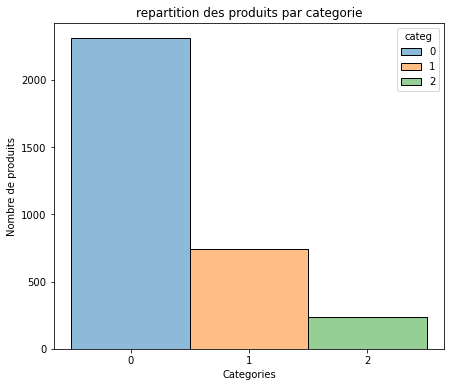

In [9]:
fig, ax = plt.subplots(figsize=(7, 6))
g = sns.histplot(products_clean,x='categ',hue="categ")
g.set(xlabel = 'Categories', ylabel = 'Nombre de produits',title='repartition des produits par categorie')
plt.show()
fig.savefig('./GRAPHIQUES/analyse_generale/repartition_produits_par_categorie.png',dpi=fig.dpi*10)
plt.close(fig)

In [10]:
describ_products = pd.DataFrame(products_clean.categ.describe())
describ_products

,categ
count,3287
unique,3
top,0
freq,2309


In [11]:
# pourcentage de produit de categorie 0
describ_products.loc["freq",:]/describ_products.loc["count",:]

categ    0.702464
dtype: object

In [12]:
# pourcentage de produit de categorie 1
products_clean.loc[products_clean.categ=='1','categ'].count()/describ_products.loc["count",:]

categ    0.224825
Name: count, dtype: object

In [13]:
# pourcentage de produit de categorie 2
products_clean.loc[products_clean.categ=='2','categ'].count()/describ_products.loc["count",:]

categ    0.072711
Name: count, dtype: object

<div class="alert alert-block alert-info">
<br>Les produits sont regroupés en 3 categorie ( 0, 1, 2);</br>
<br>70,25% des produits sont de categorie 0 , 22,48% sont de categorie 1 et 7,27% sont de categorie 2 .</br>
</div>


#### <a id="122">1- B- b - description générale des prix de produits</a>

In [14]:
tb1 = pd.DataFrame(products_clean['price'].describe())
tb2 = pd.concat([pd.DataFrame({'skewness':products_clean[['price']].skew()}).T,pd.DataFrame(({'kurtosis':products_clean[['price']].kurtosis()})).T])
tb = pd.concat([tb1,tb2])
tb.T

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
price,3287.0,21.859985,29.845962,0.62,6.99,13.06,22.99,300.0,3.799055,17.953211


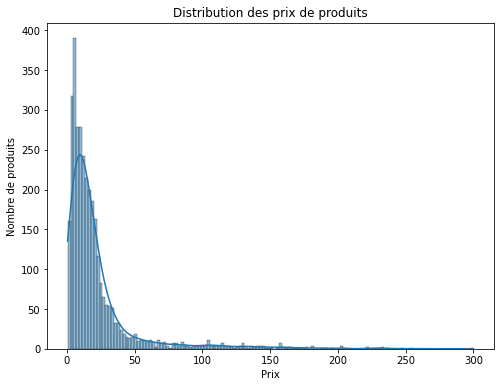

In [15]:
#distribution des prix de produits
fig, ax = plt.subplots(figsize=(8, 6))
g = sns.histplot(data=products_clean,x='price',ax=ax,kde=True)
g.set(xlabel='Prix', ylabel='Nombre de produits',title='Distribution des prix de produits')
plt.show()

<div class="alert alert-block alert-info">
<br>Les prix des produits sont compris entre 0.62€ et 300€ mais la distribution est étalée à droite comme le montre l'histogramme et le skweness empirique.</br>
 <br>Les produits coûtent en moyenne 21.86€ et 50% ces produits coutent moins de 13.06€</br>
</div>

#### <a id="123">1- B- c- description des prix par categorie de produits </a>

In [16]:
for cat in products_clean["categ"].unique():
    subset = products_clean[products_clean.categ == cat] # Création du sous-échantillon
    print("-"*20)
    print("categorie:" ,cat)
    print(subset["price"].describe())

    

--------------------
categorie: 0
count    2309.000000
mean       11.732040
std         7.564203
min         0.620000
25%         5.590000
50%        10.320000
75%        16.650000
max        40.990000
Name: price, dtype: float64
--------------------
categorie: 1
count    739.000000
mean      25.531421
std       15.425162
min        2.000000
25%       13.390000
50%       22.990000
75%       33.990000
max       80.990000
Name: price, dtype: float64
--------------------
categorie: 2
count    239.000000
mean     108.354686
std       49.561431
min       30.990000
25%       71.065000
50%      101.990000
75%      136.530000
max      300.000000
Name: price, dtype: float64


In [17]:
prodDesc1 = pd.concat([products_clean[products_clean["categ"]=="0"].price.describe(),products_clean[products_clean["categ"]=="1"].price.describe()],axis=1)
prodDesc = pd.concat([prodDesc1,products_clean[products_clean["categ"]=="2"].price.describe()],axis=1)
prodDesc.drop(['25%'],inplace=True)
prodDesc.columns = ["categ 0","categ 1","categ 2"]
prodDesc.T

,count,mean,std,min,50%,75%,max
categ 0,2309.0,11.732040,7.564203,0.62,10.32,16.65,40.99
categ 1,739.0,25.531421,15.425162,2.00,22.99,33.99,80.99
categ 2,239.0,108.354686,49.561431,30.99,101.99,136.53,300.00


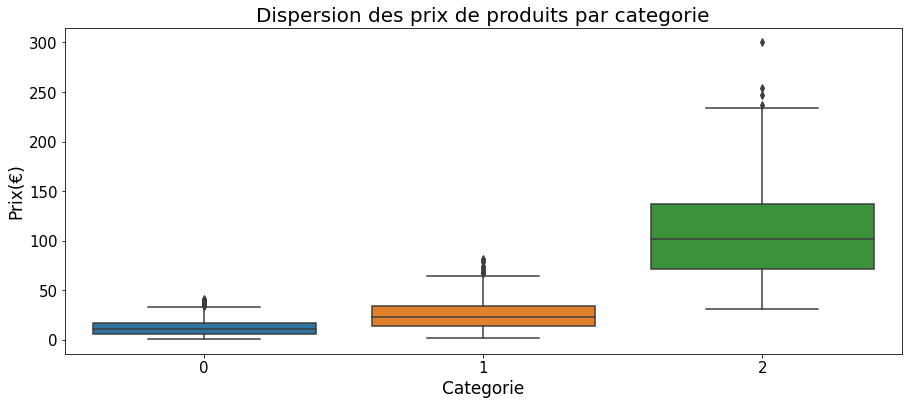

In [18]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.boxplot(data=products_clean,x='categ',y='price',ax=ax)
#g.set(xlabel='Categorie',ylabel='Prix(€)')
plt.title('Dispersion des prix de produits par categorie',fontsize="20")
plt.ylabel('Prix(€)',fontsize='17')
plt.xlabel('Categorie',fontsize="17")
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")
plt.show()
fig.savefig('./GRAPHIQUES/analyse_generale/Dispersion_des_prix_de_produits_categorie.png',dpi=fig.dpi*10)
plt.close(fig)

<div class="alert alert-block alert-info">
 <br>Les produits de categorie 0 coûtent en moyenne 11.73€ . Les prix de ces produits sont compris entre 0.62€ et 40.99€ pandant que 50% ces produits coutent moins de 10.32€ .</br>
 <br>Les prix de produits de categorie 1 sont un peu plus dispersés que ceux de categorie 0, avec des prix compris entre 2€ et 80.99€. En moyenne ils coûtent 25.53€ mais 50% de ces produits coutent moins de 22.99€</br>
 <br>Quant aux prix de produits de categorie 2, ils sont beaucoup plus dispersés que ceux des deux autres categories, avec des prix compris entre 30€ et 300€ . 50% ces produits coutent moins de 101.99€ et ils coûtent en moyenne 108.35€. </br>
 <br>Nous pouvons remarquer la presence de 4 produits de categorie 2 extremement chers allant jusqu'à 300€ .</br>
 <br>En somme , les produits de categories 2 sont en moyenne plus chers que ceux de categorie 1 ;et ceux de categorie 1 sont plus chers que ceux de categorie 0 .</br>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em"><a name="2"> 2 - ANALYSE DES VENTES</a></h2>
</div>

</div>
<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em"><a id="21">A-  Chiffre d affaire sur la periode d'exercice</a></h3>
</div>

In [19]:
data = pd.read_csv("./DATA/cleaned/in_data.csv",index_col="date",parse_dates = True)
data["categ"]=pd.Categorical(data.categ)
data.head()

,price,birth,sex,session_id,client_id,categ,id_prod,age,month,day
date,,,,,,,,,,
2021-03-01 00:01:07.843138,11.99,1967.0,f,s_1,c_329,0,0_1259,55.0,2021-03,2021-03-01
2021-03-01 00:02:26.047414,19.37,1960.0,m,s_2,c_664,0,0_1390,62.0,2021-03,2021-03-01
2021-03-01 00:02:38.311413,4.50,1988.0,m,s_3,c_580,0,0_1352,34.0,2021-03,2021-03-01
2021-03-01 00:04:54.559692,6.55,1989.0,f,s_4,c_7912,0,0_1458,33.0,2021-03,2021-03-01
2021-03-01 00:05:18.801198,16.49,1956.0,f,s_5,c_2033,0,0_1358,66.0,2021-03,2021-03-01


In [20]:
#data.info()

In [21]:
data_periode_1 = data.loc[data.month<"2022-03",:] #periode mars 2021 - fevrier 2022 
data_periode_1.head()

,price,birth,sex,session_id,client_id,categ,id_prod,age,month,day
date,,,,,,,,,,
2021-03-01 00:01:07.843138,11.99,1967.0,f,s_1,c_329,0,0_1259,55.0,2021-03,2021-03-01
2021-03-01 00:02:26.047414,19.37,1960.0,m,s_2,c_664,0,0_1390,62.0,2021-03,2021-03-01
2021-03-01 00:02:38.311413,4.50,1988.0,m,s_3,c_580,0,0_1352,34.0,2021-03,2021-03-01
2021-03-01 00:04:54.559692,6.55,1989.0,f,s_4,c_7912,0,0_1458,33.0,2021-03,2021-03-01
2021-03-01 00:05:18.801198,16.49,1956.0,f,s_5,c_2033,0,0_1358,66.0,2021-03,2021-03-01


In [22]:
CA_PERIODE_1 = data_periode_1.price.sum()

In [23]:
data_periode_2 = data.loc[data.month>"2022-02",:] #periode mars 2022 - fevrier 2023 
data_periode_2.head()

,price,birth,sex,session_id,client_id,categ,id_prod,age,month,day
date,,,,,,,,,,
2022-03-01 00:02:10.522397,15.99,1983.0,f,s_172434,c_4563,1,1_547,39.0,2022-03,2022-03-01
2022-03-01 00:04:06.323412,19.37,1977.0,m,s_172436,c_892,0,0_1390,45.0,2022-03,2022-03-01
2022-03-01 00:04:52.633371,5.22,1975.0,f,s_172433,c_7212,0,0_1254,47.0,2022-03,2022-03-01
2022-03-01 00:04:55.646536,29.99,1998.0,f,s_172441,c_4144,1,1_287,24.0,2022-03,2022-03-01
2022-03-01 00:06:37.339413,5.67,1969.0,m,s_172442,c_3454,0,0_1282,53.0,2022-03,2022-03-01


In [24]:
CA_PERIODE_2 = data_periode_2.price.sum()

<a id="21">2- A- CHIFFRE D'AFFAIRE</a>

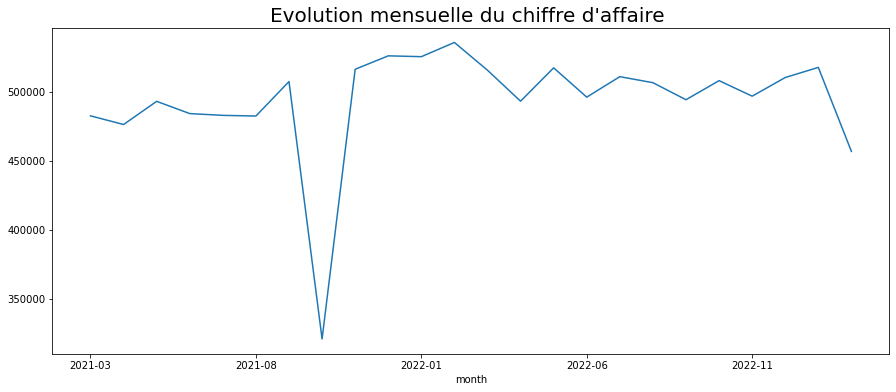

In [25]:
plt.figure(figsize=(15,6))
data.groupby("month")['price'].sum().plot()
plt.title("Evolution mensuelle du chiffre d'affaire ",fontsize = 20)
plt.show()

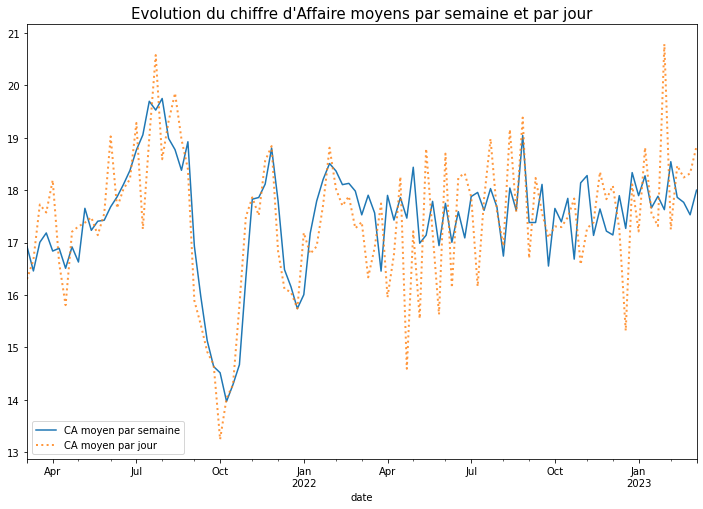

In [26]:
plt.figure(figsize=(12,8))
data['price'].resample('W').mean().plot(label="CA moyen par semaine")
data['price'].resample('D').mean().plot(label="CA moyen par jour",lw=2,ls=':',alpha=0.8)
plt.title("Evolution du chiffre d'Affaire moyens par semaine et par jour",fontsize=15)
plt.legend()
plt.show()
fig.savefig('./GRAPHIQUES/analyse_generale/evolution_CA_semaine_jour.png',dpi=fig.dpi*10)
plt.close(fig)

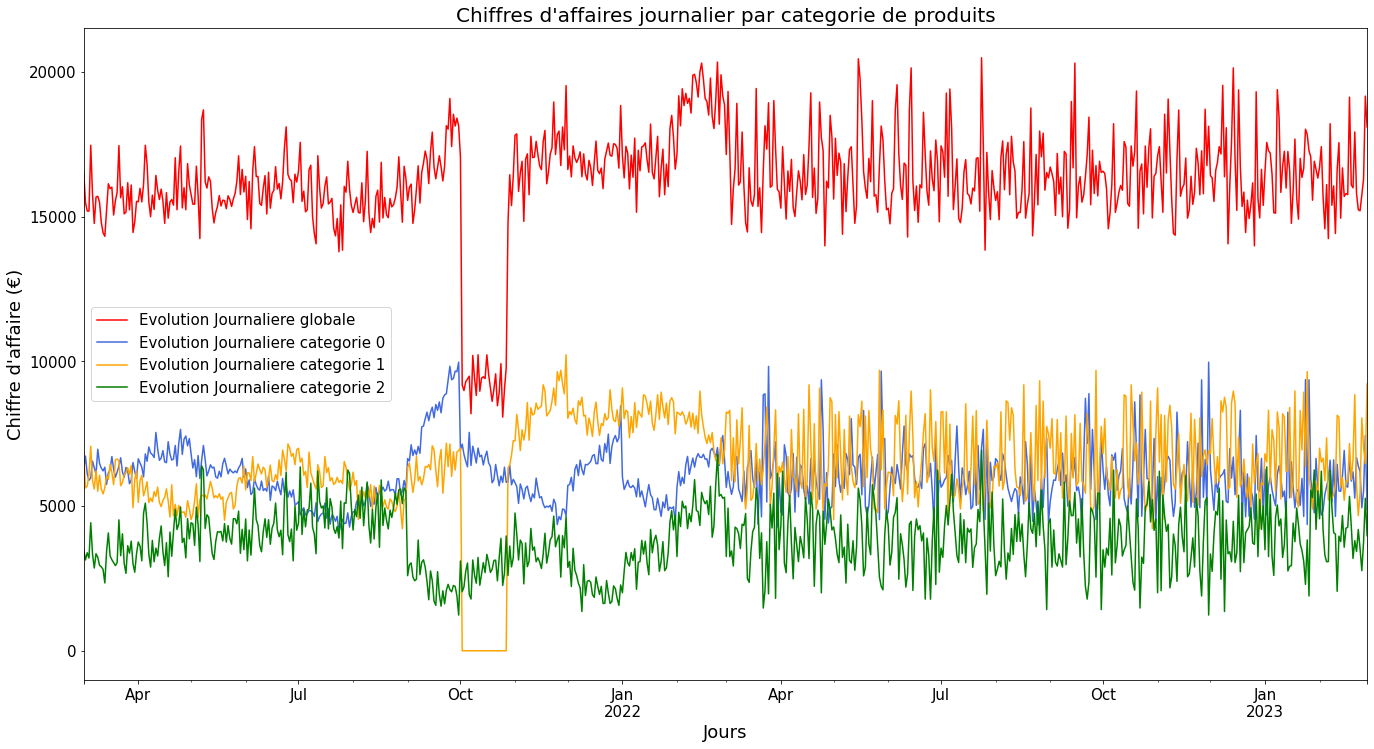

In [27]:
fig = plt.figure(figsize=(23,12))
data['price'].resample('D').sum().plot(label="Evolution Journaliere globale",color = "red")
data.loc[data.categ==0,'price'].resample('D').sum().plot(label="Evolution Journaliere categorie 0",color='royalblue')
data.loc[data.categ==1,'price'].resample('D').sum().plot(label="Evolution Journaliere categorie 1",color='orange')
data.loc[data.categ==2,'price'].resample('D').sum().plot(label="Evolution Journaliere categorie 2",color='green')
plt.title("Chiffres d'affaires journalier par categorie de produits",fontsize=20)
plt.ylabel("Chiffre d'affaire (€)",fontsize=18)
plt.xlabel('Jours',fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()
fig.savefig('./GRAPHIQUES/analyse_generale/Chiffres d affaires journalier par categorie de produits.png',dpi=fig.dpi*10)
plt.close(fig)

<div class="alert alert-block alert-info">
 <br>En analysant le graphique ci-dessus nous pouvons constater une discontinuité de la courbe d'evolution du chiffre d'affaire journalier globale causée par une discontinuité de la courbe d'evolution du chiffre d'affaire journalier du mois d'octobre pour la categorie 1</br>
</div>

### Decomposition saisonnière du CA mensuel

In [28]:
data.head()

,price,birth,sex,session_id,client_id,categ,id_prod,age,month,day
date,,,,,,,,,,
2021-03-01 00:01:07.843138,11.99,1967.0,f,s_1,c_329,0,0_1259,55.0,2021-03,2021-03-01
2021-03-01 00:02:26.047414,19.37,1960.0,m,s_2,c_664,0,0_1390,62.0,2021-03,2021-03-01
2021-03-01 00:02:38.311413,4.50,1988.0,m,s_3,c_580,0,0_1352,34.0,2021-03,2021-03-01
2021-03-01 00:04:54.559692,6.55,1989.0,f,s_4,c_7912,0,0_1458,33.0,2021-03,2021-03-01
2021-03-01 00:05:18.801198,16.49,1956.0,f,s_5,c_2033,0,0_1358,66.0,2021-03,2021-03-01


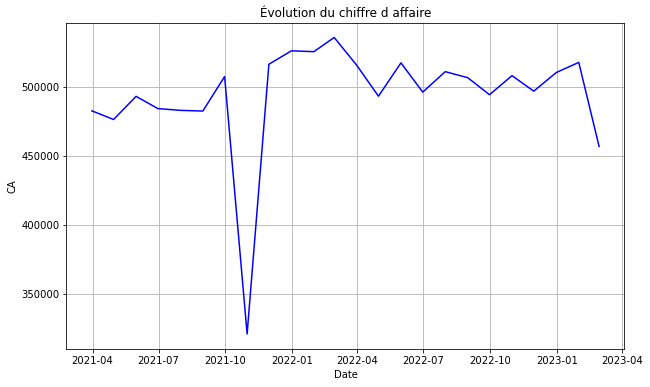

In [29]:
# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(data['price'].resample('M').sum(), color='blue')
plt.title('Évolution du chiffre d affaire')
plt.xlabel('Date')
plt.ylabel('CA')
plt.grid(True)
plt.show()
fig.savefig('./GRAPHIQUES/analyse_generale/Evolution_CA.png',dpi=fig.dpi*10)
plt.close(fig)

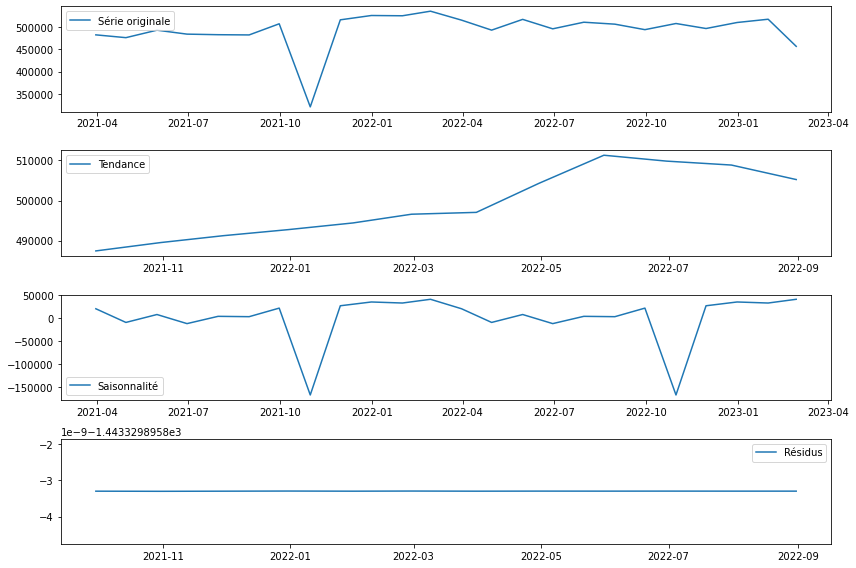

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Effectuer la décomposition saisonnière
decomposition = seasonal_decompose(data['price'].resample('M').sum(), model='additive')

# Extraire les composantes de la décomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Afficher les composantes de la décomposition
fig = plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data['price'].resample('M').sum(), label='Série originale')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Tendance')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Saisonnalité')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Résidus')
plt.legend(loc='best')

plt.tight_layout()
plt.show()
fig.savefig('./GRAPHIQUES/analyse_generale/Decomposition saisonnière du CA mensuel',dpi=fig.dpi*10)
plt.close(fig)

<div class="alert alert-block alert-info">
 <br>En observant la decomposition saisonnière on peut s'apercevoir que le chiffre d'affaire suit une tendance haussiere jusqu'au mois de juin 2022 où la tendance devient baissière .</br>
</div>

#### Etude du chiffre d'affaire de produit de categorie 1

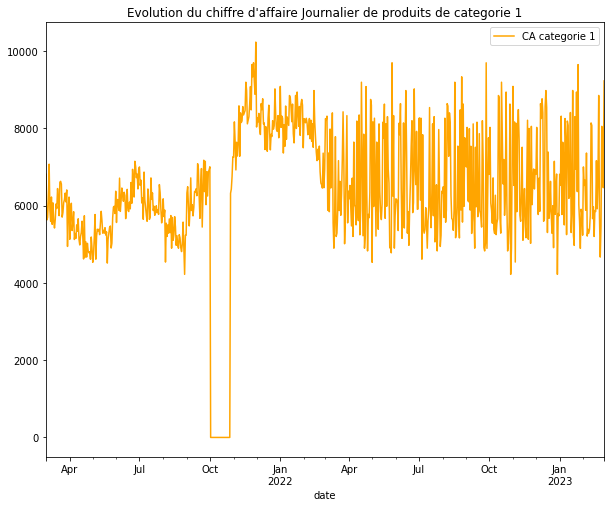

In [31]:
fig = plt.figure(figsize=(10,8))
data.loc[data.categ==1,'price'].resample('D').sum().plot(label="CA categorie 1",color='orange')
plt.title("Evolution du chiffre d'affaire Journalier de produits de categorie 1")
plt.legend()
plt.show()
fig.savefig('./GRAPHIQUES/analyse_generale/Evolution du chiffre d affaire Journalier de produits de categorie 1',dpi=fig.dpi*10)
plt.close(fig)

#### methode d'imputation du CA du mois d octobre 2021 pour les produits de categorie 1

In [32]:
# la mediane des Chiffres d'affaire des produits de categorie 1 des mois qui précède le mois d'octobre 2021
D= data_periode_1.loc[data_periode_1.categ==1,:].groupby('month').price.sum()
#D.head()
CA_cat1_oct = D.iloc[D.index < '2021-10'].median()
print(D.iloc[D.index < '2021-10'],CA_cat1_oct)

month
2021-03    186974.17
2021-04    156138.35
2021-05    165893.40
2021-06    189162.04
2021-07    188523.27
2021-08    162991.38
2021-09    190613.78
Name: price, dtype: float64 186974.16999999998


<div class="alert alert-block alert-info">
 <br>Nous affectons au mois d'octobre 2021 la mediane des Chiffres d'affaire des produits de categorie 1 des mois qui le précède.
</div>

### Analyse descriptive mensuelle de la serie

In [33]:
# Analyses descriptives mensuelles de la serie
m = data['price'].resample('M').agg(['mean','std','min','max','count','skew'])
m.T

date,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
mean,16.865799,16.735747,17.425631,18.027274,19.516424,18.799435,15.224166,14.850906,18.229146,16.202169,...,17.248256,17.399812,17.812670,17.741216,17.453803,17.533570,17.385554,17.826356,17.882552,17.875301
std,17.417284,17.942180,19.646999,19.124740,21.094962,21.544468,14.307994,17.777688,17.901608,14.438445,...,17.980352,17.995941,19.212049,17.962331,18.128194,18.623793,18.137485,18.725450,19.155875,18.945976
min,0.620000,0.620000,0.620000,0.620000,0.660000,0.620000,0.660000,0.620000,0.930000,0.810000,...,0.660000,0.620000,0.810000,0.620000,0.620000,0.620000,0.660000,0.810000,0.770000,0.660000
max,300.000000,247.220000,300.000000,300.000000,247.220000,254.440000,247.220000,247.220000,254.440000,300.000000,...,247.220000,300.000000,254.440000,300.000000,254.440000,247.220000,300.000000,300.000000,247.220000,247.220000
count,28610.000000,28457.000000,28293.000000,26857.000000,24742.000000,25659.000000,33326.000000,21606.000000,28321.000000,32464.000000,...,29991.000000,28511.000000,28682.000000,28552.000000,28315.000000,28974.000000,28574.000000,28625.000000,28945.000000,25552.000000
skew,5.744026,5.260700,5.358779,5.044704,4.589479,4.893083,6.270999,5.733116,5.428155,6.243021,...,5.353508,5.485925,5.343984,5.199277,5.167744,5.408335,5.572499,5.352372,5.384361,5.284116


In [34]:
# Chiffre d'affaire mensuel depuis 03-2021 (L'ensemble des deux periodes annuelles d'exercice)
CA = pd.DataFrame(data.groupby(['month']).sum()["price"])
CA.sort_values(by="month",ascending=True)
CA_global = CA.sum() + CA_cat1_oct
CA_global

price    12042910.64
dtype: float64

In [35]:
CA

,price
month,
2021-03,482530.52
2021-04,476249.16
2021-05,493023.39
2021-06,484158.49
2021-07,482875.36
2021-08,482374.70
2021-09,507360.56
2021-10,320868.67
2021-11,516267.63


In [36]:
# CA (mars2021 - mai2021)
mars2021_mai2021 = CA[CA.index<'2021-06']
print(mars2021_mai2021,mars2021_mai2021.sum())


             price
month             
2021-03  482530.52
2021-04  476249.16
2021-05  493023.39 price    1451803.07
dtype: float64


In [37]:
# CA (juin2021 - Aout2021)
juin2021_Aout2021 = CA[(CA.index<'2021-09') & (CA.index > '2021-05')]
print(juin2021_Aout2021,juin2021_Aout2021.sum())

             price
month             
2021-06  484158.49
2021-07  482875.36
2021-08  482374.70 price    1449408.55
dtype: float64


In [38]:
# CA (Sept2021 - Nov2021)
Sept2021_Nov2021 = CA[(CA.index<'2021-12') & (CA.index > '2021-08')]
caseptnov = CA[(CA.index<'2021-12') & (CA.index > '2021-08')].sum()
# CA (Sept2021 - Nov2021) + octobre
caseptnovplus = CA[(CA.index<'2021-12') & (CA.index > '2021-08')].sum() + CA_cat1_oct
print(Sept2021_Nov2021,caseptnov,caseptnovplus)

             price
month             
2021-09  507360.56
2021-10  320868.67
2021-11  516267.63 price    1344496.86
dtype: float64 price    1531471.03
dtype: float64


In [39]:
# CA (Dec - Fev 2022)
Dec_Fev2022 = CA[(CA.index<'2022-03') & (CA.index > '2021-11')]
print(Dec_Fev2022,Dec_Fev2022.sum())

             price
month             
2021-12  525987.21
2022-01  525388.94
2022-02  535681.39 price    1587057.54
dtype: float64


In [40]:
# CA (Mars 2022 - Mai 2022)
Mars2022_Mai2022 = CA[(CA.index<'2022-06') & (CA.index > '2022-02')]
print(Mars2022_Mai2022,Mars2022_Mai2022.sum())

             price
month             
2022-03  515566.42
2022-04  493138.80
2022-05  517292.44 price    1525997.66
dtype: float64


In [41]:
# CA (Juin 2022 - Aout 2022)
Juin2022_Aout2022 = CA[(CA.index<'2022-09') & (CA.index > '2022-05')]
print(Juin2022_Aout2022,Juin2022_Aout2022.sum())

             price
month             
2022-06  496086.05
2022-07  510903.00
2022-08  506547.19 price    1513536.24
dtype: float64


In [42]:
# CA (Sept 2022 - Nov 2022)
Sept2022_Nov2022 = CA[(CA.index<'2022-12') & (CA.index > '2022-08')]
print(Sept2022_Nov2022,Sept2022_Nov2022.sum())

             price
month             
2022-09  494204.44
2022-10  508017.67
2022-11  496774.83 price    1498996.94
dtype: float64


In [43]:
# CA (Dec 2022 - Fev 2023)
Dec2022_Fev2023 = CA[CA.index > '2022-11']
print(Dec2022_Fev2023,Dec2022_Fev2023.sum())

             price
month             
2022-12  510279.44
2023-01  517610.48
2023-02  456749.69 price    1484639.61
dtype: float64


In [44]:
# CA 1ere periode
ca1p = CA[CA.index < '2022-03']
print(ca1p,ca1p.sum(),ca1p.sum() + CA_cat1_oct)

             price
month             
2021-03  482530.52
2021-04  476249.16
2021-05  493023.39
2021-06  484158.49
2021-07  482875.36
2021-08  482374.70
2021-09  507360.56
2021-10  320868.67
2021-11  516267.63
2021-12  525987.21
2022-01  525388.94
2022-02  535681.39 price    5832766.02
dtype: float64 price    6019740.19
dtype: float64


In [45]:
# CA 2e periode
ca2p = CA[CA.index > '2022-02']
print(ca2p,ca2p.sum())

             price
month             
2022-03  515566.42
2022-04  493138.80
2022-05  517292.44
2022-06  496086.05
2022-07  510903.00
2022-08  506547.19
2022-09  494204.44
2022-10  508017.67
2022-11  496774.83
2022-12  510279.44
2023-01  517610.48
2023-02  456749.69 price    6023170.45
dtype: float64


#### ANALYSE SANS LE MOIS D' OCTOBRE 2021

In [46]:
data_without_oct  = data.loc[(data.month !='2021-10')]  # retranche les données du mois d'octobre
CA_without_oct = pd.DataFrame(data_without_oct.groupby(['month']).sum()["price"])
CA_without_oct.sort_values(by="month",ascending=True)

,price
month,
2021-03,482530.52
2021-04,476249.16
2021-05,493023.39
2021-06,484158.49
2021-07,482875.36
2021-08,482374.70
2021-09,507360.56
2021-11,516267.63
2021-12,525987.21


<Figure size 1080x432 with 0 Axes>

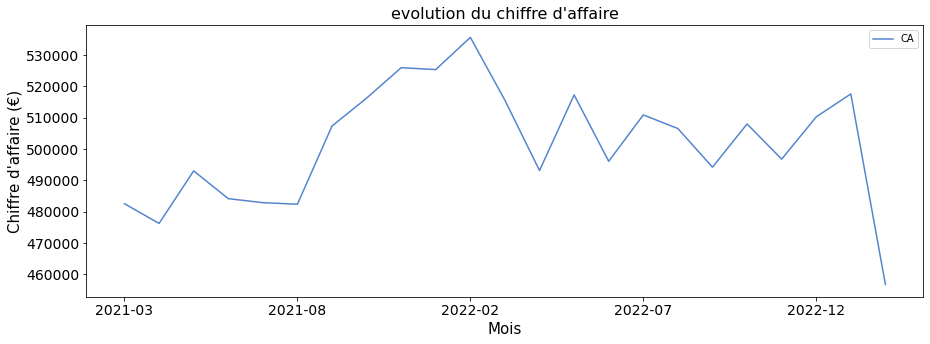

In [47]:
fig = plt.figure(figsize=(15,6))
CA_without_oct.plot(y='price',figsize=(15,5),color='#5485CC',label='CA')
plt.title("evolution du chiffre d'affaire",fontsize=16)
plt.ylabel("Chiffre d'affaire (€)",fontsize=15)
plt.xlabel('Mois',fontsize=15)
plt.legend()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()
fig.savefig('./GRAPHIQUES/analyse_generale/Evolution_du_chiffre_daffaire.png',dpi=fig.dpi*10)
plt.close(fig)

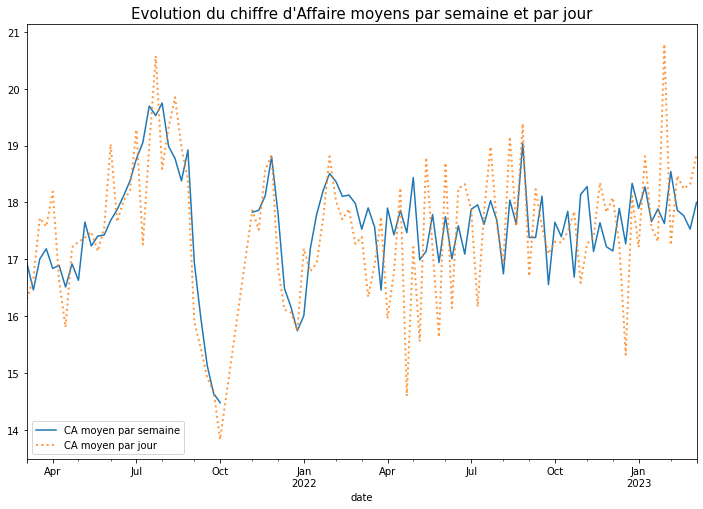

In [48]:
plt.figure(figsize=(12,8))
data_without_oct['price'].resample('W').mean().plot(label="CA moyen par semaine")
data_without_oct['price'].resample('D').mean().plot(label="CA moyen par jour",lw=2,ls=':',alpha=0.8)
plt.title("Evolution du chiffre d'Affaire moyens par semaine et par jour",fontsize=15)
plt.legend()
plt.show()

<Figure size 1440x1080 with 0 Axes>

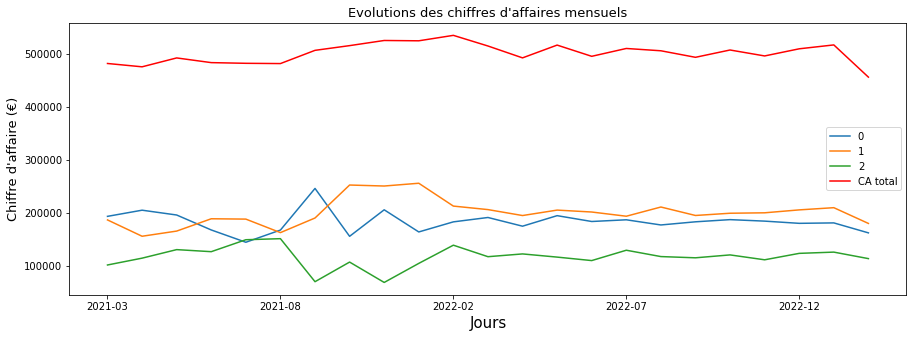

In [49]:
fig = plt.figure(figsize=(20,15))
data_without_oct.groupby(['month','categ']).sum()["price"].unstack().plot(kind='line',stacked=False,figsize=(15,5))
data_without_oct.groupby(['month']).sum()["price"].plot(kind='line',color = "red",label="CA total",figsize=(15,5))
plt.title("Evolutions des chiffres d'affaires mensuels",fontsize=13)
plt.ylabel("Chiffre d'affaire (€)",fontsize=13)
plt.xlabel('Jours',fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.legend()
plt.show()
fig.savefig('./GRAPHIQUES/analyse_generale/Evolution_des_CA_mensuels.png',dpi=fig.dpi*10)
plt.close(fig)

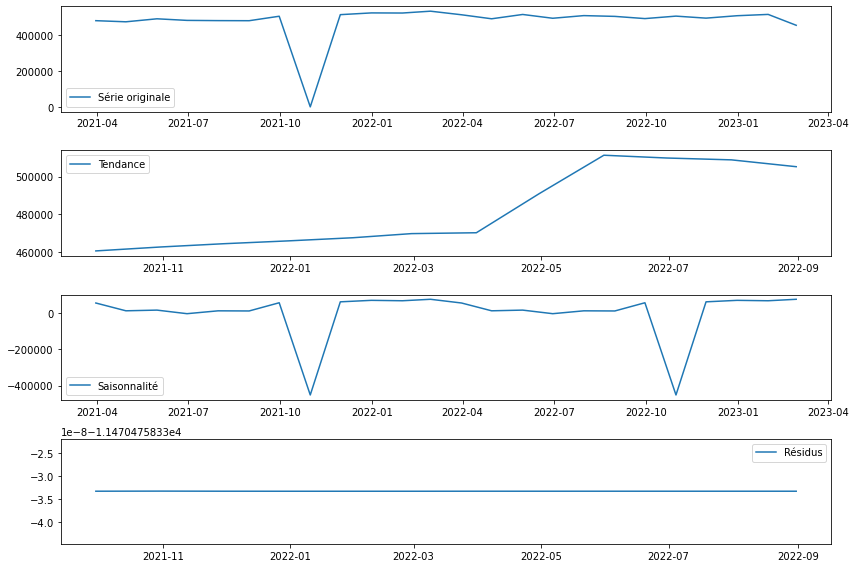

In [50]:
# Effectuer la décomposition saisonnière
decomposition = seasonal_decompose(data_without_oct['price'].resample('M').sum(), model='additive')

# Extraire les composantes de la décomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Afficher les composantes de la décomposition
fig = plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data_without_oct['price'].resample('M').sum(), label='Série originale')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Tendance')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Saisonnalité')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Résidus')
plt.legend(loc='best')

plt.tight_layout()
plt.show()
fig.savefig('./GRAPHIQUES/analyse_generale/Decomposition saisonnière du CA mensuel excluant OCTOBRE 2021',dpi=fig.dpi*10)
plt.close(fig)

In [51]:
CA.sort_values(by="price",ascending=False)

,price
month,
2022-02,535681.39
2021-12,525987.21
2022-01,525388.94
2023-01,517610.48
2022-05,517292.44
2021-11,516267.63
2022-03,515566.42
2022-07,510903.00
2022-12,510279.44


<div class="alert alert-block alert-info">
<br> Il y a une croissance continue a partir du mois d'octobre 2021 jusqu'en juin 2022 </br> 
<br> Puis depuis juin 2022 la tendance est a la baisse.</br>
</div>

</div>
<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em"><a id="22">B-  proportions de vente par categorie de produits</a></h3>
</div>

In [52]:
# Nombre de produits vendus par mois et par categorie

NV = pd.DataFrame(data.groupby(['month','categ']).size())
NV.columns = ["nombre de produits vendus"] 
NV.reset_index(inplace=True)
NV.head()

,month,categ,nombre de produits vendus
0,2021-03,0,18140
1,2021-03,1,9134
2,2021-03,2,1336
3,2021-04,0,19356
4,2021-04,1,7579


In [53]:
# Proportion de produits vendus par categorie
CV = pd.DataFrame(NV.groupby(['categ']).sum()["nombre de produits vendus"])
CV= CV.reset_index()
CV.head()

,categ,nombre de produits vendus
0,0,415680
1,1,227169
2,2,36483


In [54]:
CA_categ = pd.DataFrame(data.groupby(['categ']).sum()['price'])
CA_categ.reset_index(inplace=True)
CA_categ.columns = ['categ','CA']

In [55]:
Tableau = pd.merge(CV,CA_categ,how='outer')
Tableau.columns = ['categ','nombre de produits vendus',"chiffre d'affaire généré (€)"]
Tableau['proportions du CA'] = (Tableau["chiffre d'affaire généré (€)"] / Tableau["chiffre d'affaire généré (€)"].sum())*100
Tableau['proportions en nombre de produit vendus'] = (Tableau["nombre de produits vendus"] / Tableau["nombre de produits vendus"].sum())*100
print ("Proportion de vente par categorie et chiffre d'affaire correspondant.")
Tableau

Proportion de vente par categorie et chiffre d'affaire correspondant.


,categ,nombre de produits vendus,chiffre d'affaire généré (€),proportions du CA,proportions en nombre de produit vendus
0,0,415680,4421938.76,37.297254,61.189521
1,1,227169,4653722.69,39.252257,33.440056
2,2,36483,2780275.02,23.450489,5.370423


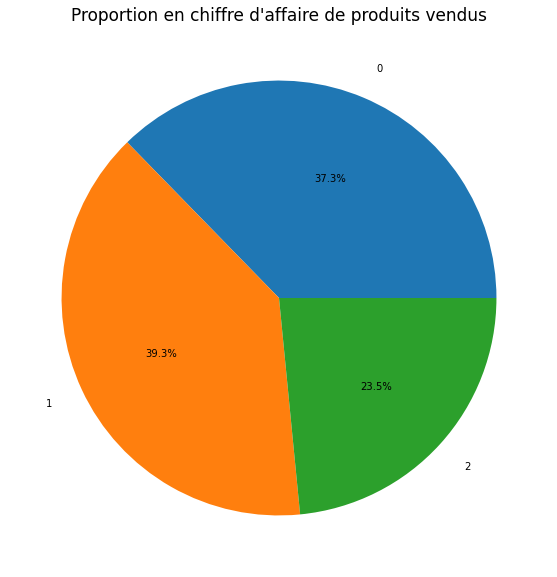

In [56]:
#Proportion en chiffre d'affaire de produits vendus
fig, ax = plt.subplots(figsize=(14, 10))
plt.pie(Tableau["chiffre d'affaire généré (€)"],labels=Tableau.categ,autopct='%1.1f%%', labeldistance=1.15)
plt.title("Proportion en chiffre d'affaire de produits vendus",fontsize=17)
plt.show()
fig.savefig('./GRAPHIQUES/analyse_generale/Proportion_CA_de_produits_vendus_par_categorie.png',dpi=fig.dpi*10)
plt.close(fig)

<Figure size 432x288 with 0 Axes>

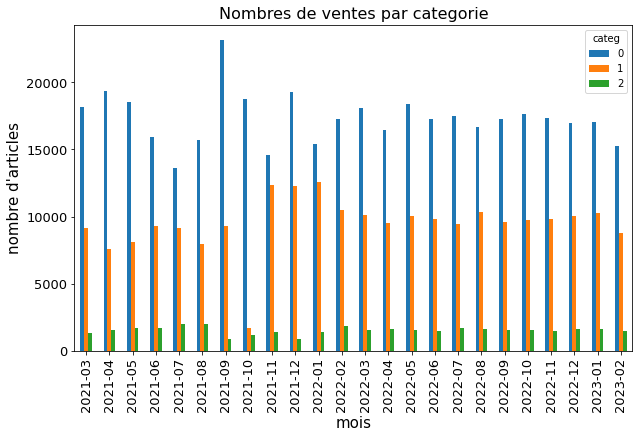

In [57]:
# Nombre de produits vendus par categorie
fig = plt.figure()
data.groupby(['month','categ']).size().unstack().plot(kind='bar',stacked=False, figsize=(10,6))
plt.title("Nombres de ventes par categorie",fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("mois",fontsize=15)
plt.ylabel("nombre d'articles",fontsize=15)
plt.show()
fig.savefig('./GRAPHIQUES/analyse_generale/Distribution_de_prix_de_produits_1.png',dpi=fig.dpi*10)
plt.close(fig)

In [58]:
Tableau

,categ,nombre de produits vendus,chiffre d'affaire généré (€),proportions du CA,proportions en nombre de produit vendus
0,0,415680,4421938.76,37.297254,61.189521
1,1,227169,4653722.69,39.252257,33.440056
2,2,36483,2780275.02,23.450489,5.370423


In [59]:
Tableau['nombre de produits vendus'].sum()

679332

In [60]:
Tableau["chiffre d'affaire généré (€)"].sum()

11855936.469999999

In [61]:
data.price.sum()

11855936.47

<div class="alert alert-block alert-info">
<br>Au total , si on ignore les données perdues du mois d'octobre 2021 , 679332 articles ont été vendus ; 415680 articles de categorie 0 , 227169 articles de categorie 1 et 36483 articles de categorie 2</br> 
<br>Au total 11855936.47 € a été générés  ; 4421938.76 € en articles de categorie 0 , 4653722.69 € en articles de categorie 1 et 2780275.02 € en articles de categorie 2</br> 
</div>

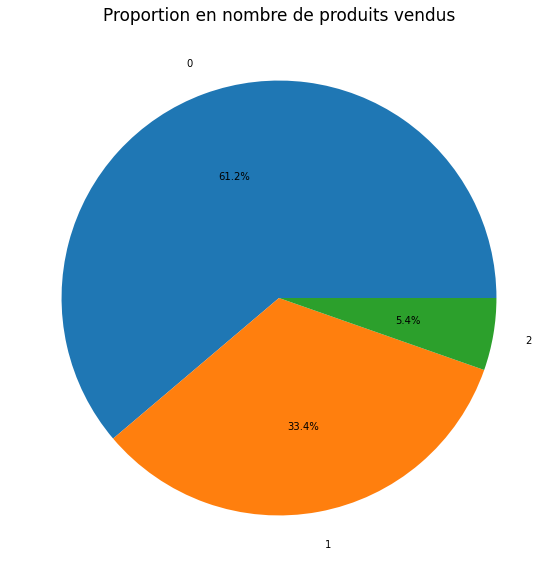

In [62]:
fig, ax = plt.subplots(figsize=(14, 10))
plt.pie(Tableau['proportions en nombre de produit vendus'],labels=Tableau.categ,autopct='%1.1f%%', labeldistance=1.15)
plt.title('Proportion en nombre de produits vendus',fontsize=17)
plt.show()
fig.savefig('./GRAPHIQUES/analyse_generale/Proportion_nombre_de_produits_vendus_par_categorie.png',dpi=fig.dpi*10)
plt.close(fig)

In [63]:
data.groupby('id_prod').count()['categ'].sort_values(ascending=False).head(10)

id_prod
1_369    2252
1_417    2189
1_414    2180
1_498    2128
1_425    2096
1_403    1960
1_412    1951
1_413    1945
1_406    1939
1_407    1935
Name: categ, dtype: int64

<div class="alert alert-block alert-info">
<br>Ci-dessus les 10 produits les plus vendus .</br> 
</div>


</div>
<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em"><a id="23">C-description des prix de produits vendus sur la periode d exercice</a></h3>
</div>

#### <a id="231">2- C-1 - description des prix par categorie de produits </a>

In [64]:
tab1 = pd.DataFrame(data.price.describe())
#tab1
tab2=  pd.concat([pd.DataFrame({'skewness':data[['price']].skew()}).T,pd.DataFrame(({'kurtosis':data[['price']].kurtosis()})).T])
tab = pd.concat([tab1,tab2])
tab.drop(['25%','count'],inplace=True)
tab.T

,mean,std,min,50%,75%,max,skewness,kurtosis
price,17.452345,18.32651,0.62,13.99,18.99,300.0,5.391175,43.08161


In [65]:
#categ,id_prod,client_id,sex
pd.concat([data.categ.describe(),data.id_prod.describe(),data.sex.describe()],axis=1)

,categ,id_prod,sex
count,679332,679332,679332
unique,3,3266,2
top,0,1_369,m
freq,415680,2252,340930


<div class="alert alert-block alert-info">
<br>Un produits vendu coûte en moyenne 17.45€ .</br> 
<br>Le produits le plus vendu est le produit d'id_prod = 1_369 qui a été vendu 2252 fois .</br> 
<br>Nous pouvons remarquer au passage que bienque minoritaire dans la base de données clients , les hommes detiennent le record en terme de frequence d'achat.</br>

</div>

#### <a id="232">2- C-2 - description des prix de panier moyen </a>

In [66]:
data_paniers = pd.read_csv('data_paniers.csv')
data_paniers.head()

,session_id,montant_dupanier,nombre_article,client_id,age,birth,sex,month,day,date
0,s_1,11.99,1,c_329,55.0,1967.0,f,2021-03,2021-03-01,2021-03-01 00:01:07.843138
1,s_10,26.99,1,c_2218,52.0,1970.0,f,2021-03,2021-03-01,2021-03-01 00:10:33.163037
2,s_100,33.72,2,c_3854,44.0,1978.0,f,2021-03,2021-03-01,2021-03-01 04:12:43.572994
3,s_1000,39.22,4,c_1014,33.0,1989.0,m,2021-03,2021-03-03,2021-03-03 02:38:09.568389
4,s_10000,41.49,3,c_476,33.0,1989.0,f,2021-03,2021-03-22,2021-03-22 17:46:05.819130


In [67]:
data_paniers.describe()

,montant_dupanier,nombre_article,age,birth
count,342315.000000,342315.000000,342315.000000,342315.000000
mean,34.634581,1.984523,45.838660,1976.161340
std,32.597753,1.272392,14.900547,14.900547
min,0.620000,1.000000,18.000000,1929.000000
25%,15.560000,1.000000,35.000000,1967.000000
50%,25.790000,2.000000,44.000000,1978.000000
75%,43.170000,3.000000,55.000000,1987.000000
max,568.880000,14.000000,93.000000,2004.000000


<div class="alert alert-block alert-info">
<br>En moyenne le panier a couté 34.63 € .</br> 
<br>Et le panier le plus cher à couté 568.88 €.</br> 
<br>Mais il faut noter que 75% des paniers coutent moins de 43.17€ .</br> 

</div>

#### <a id="233">2- C-3 - meilleure journée de vente par chiffre d affaire, meilleur produit </a>


In [68]:
#Les 10 produits qui ont générés le plus de chiffre d'affaire
CA_produit = data.groupby("id_prod").sum()['price']
CA_produit = pd.DataFrame(CA_produit)
CA_produit = CA_produit.sort_values(by='price',ascending=False)
CA_produit.columns = ["Chiffre d'affaire généré par produit"]
CA_produit.head(10)

,Chiffre d'affaire généré par produit
id_prod,
2_159,94893.50
2_135,69334.95
2_112,65407.76
2_102,60736.78
2_209,56971.86
1_395,54356.25
1_369,54025.48
2_110,53846.25
2_39,53060.85


<div class="alert alert-block alert-info">
<br>Ci-dessus les 10 produits qui ont généré plus de chiffre d'affaire avec en tête le produit d'id_prod 2_159.On peut s'apercevoir que ce sont généralement les produits de categorie 2</br> 
</div>

In [69]:
# Journée le plus productive
CA_jour = data.groupby("day").sum()["price"]
pd.DataFrame(CA_jour).sort_values(by="price",ascending=False).head(10)

,price
day,
2022-07-24,20497.67
2022-05-15,20461.86
2022-02-24,20348.69
2022-09-15,20312.88
2022-02-15,20312.88
2022-06-14,20146.21
2022-12-14,20146.21
2022-02-14,19997.23
2022-02-11,19923.68


In [70]:
# Journée la moins productive
pd.DataFrame(CA_jour).sort_values(by="price",ascending=True).head(10)

,price
day,
2021-10-25,8076.04
2021-10-07,8191.08
2021-10-22,8467.86
2021-10-19,8621.69
2021-10-10,8825.65
2021-10-23,8910.64
2021-10-12,8971.15
2021-10-03,8993.05
2021-10-26,9030.78


<div class="alert alert-block alert-info">
<br>Le 24 Juillet 2022 a été le jour le plus productif.</br> 
<br>Le 25 octobre 2021 a été le jour le moins productif. Certainement à cause des données manquantes qui n'ont pas été prises en compte</br>
</div>

#### <a id="234">2- C-4 - concentration du chiffre d'affaire par produits  </a>

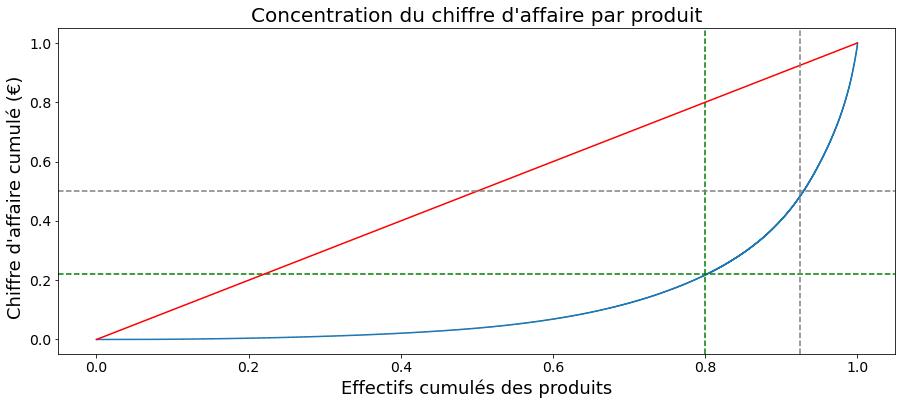

In [71]:
fig = plt.figure(figsize=(15,6))
prod = CA_produit["Chiffre d'affaire généré par produit"].values
lorenz = np.cumsum(np.sort(prod)) / prod.sum()
lorenz = np.append([0],lorenz) #
plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
#----------------lignes---------------------------- 
plt.axvline(x=0.8,color='green',linestyle='--')
plt.axhline(y=0.22,color='green',linestyle='--')
plt.plot([0.0, 1], [0.0, 1], 'r-')


plt.axhline(y=0.5,color='gray',linestyle='--')
plt.axvline(x=0.925,color='gray',linestyle='--')
#-----------------------------------------
plt.title("Concentration du chiffre d'affaire par produit",fontsize=20)
plt.ylabel("Chiffre d'affaire cumulé (€)  ",fontsize=18)
plt.xlabel('Effectifs cumulés des produits',fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()
fig.savefig('./GRAPHIQUES/analyse_generale/Concentration_du_chiffre_d_affaire_par_produit.png',dpi=fig.dpi*10)
plt.close(fig)

In [72]:
# Indice de Gini
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # 
S = 0.5 - aire_ss_courbe # 
gini = 2*S
gini

0.743223378595067

<div class="alert alert-block alert-info">
<br>En observant la concentration du chiffre d'affaire à travers cette courbe de lorentz on voit que 20% des produits les mieux vendus produisent près de 80% du chiffre d'affaire .
</br> 
<br>Cette distribution suit la loi de pareto .</br> 
<br>Il serait donc judicieux de mettre l'accent sur ces produits pour augmenter le chiffre d'affaire .</br>
</div>

</div>
<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em"><a id="24">D-Clients actifs  </a></h3>
</div>

### <a id="241">2- D- a- description generale des ages des clients et sexe</a>

In [73]:
#pd.DataFrame(tab.age)
pd.concat([data.client_id.describe(),data.sex.describe()],axis=1)

,client_id,sex
count,679332,679332
unique,8600,2
top,c_1609,m
freq,25488,340930


In [74]:
pd.DataFrame(data["age"]).describe().T

,count,mean,std,min,25%,50%,75%,max
age,679332.0,44.188861,13.574553,18.0,35.0,42.0,52.0,93.0


In [75]:
data_paniers.head()

,session_id,montant_dupanier,nombre_article,client_id,age,birth,sex,month,day,date
0,s_1,11.99,1,c_329,55.0,1967.0,f,2021-03,2021-03-01,2021-03-01 00:01:07.843138
1,s_10,26.99,1,c_2218,52.0,1970.0,f,2021-03,2021-03-01,2021-03-01 00:10:33.163037
2,s_100,33.72,2,c_3854,44.0,1978.0,f,2021-03,2021-03-01,2021-03-01 04:12:43.572994
3,s_1000,39.22,4,c_1014,33.0,1989.0,m,2021-03,2021-03-03,2021-03-03 02:38:09.568389
4,s_10000,41.49,3,c_476,33.0,1989.0,f,2021-03,2021-03-22,2021-03-22 17:46:05.819130


In [76]:
data_client_actifs = data_paniers.drop_duplicates(subset="client_id",keep="first")
data_client_actifs.head()

,session_id,montant_dupanier,nombre_article,client_id,age,birth,sex,month,day,date
0,s_1,11.99,1,c_329,55.0,1967.0,f,2021-03,2021-03-01,2021-03-01 00:01:07.843138
1,s_10,26.99,1,c_2218,52.0,1970.0,f,2021-03,2021-03-01,2021-03-01 00:10:33.163037
2,s_100,33.72,2,c_3854,44.0,1978.0,f,2021-03,2021-03-01,2021-03-01 04:12:43.572994
3,s_1000,39.22,4,c_1014,33.0,1989.0,m,2021-03,2021-03-03,2021-03-03 02:38:09.568389
4,s_10000,41.49,3,c_476,33.0,1989.0,f,2021-03,2021-03-22,2021-03-22 17:46:05.819130


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


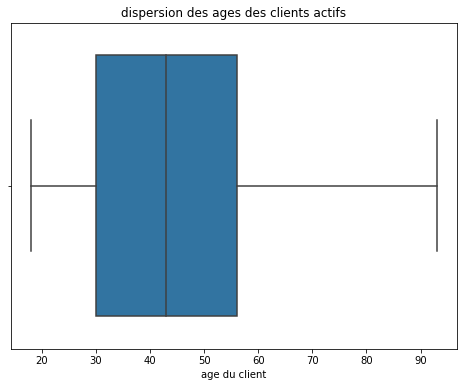

In [77]:
# dispersion des ages des clients
fig, ax = plt.subplots(figsize=(8, 6))
g = sns.boxplot(data_client_actifs.age,ax=ax)
g.set(xlabel='age du client',title='dispersion des ages des clients actifs')
plt.show()
fig.savefig('./GRAPHIQUES/analyse_generale/Dispersion_des_ages_clients.png',dpi=fig.dpi*10)
plt.close(fig)

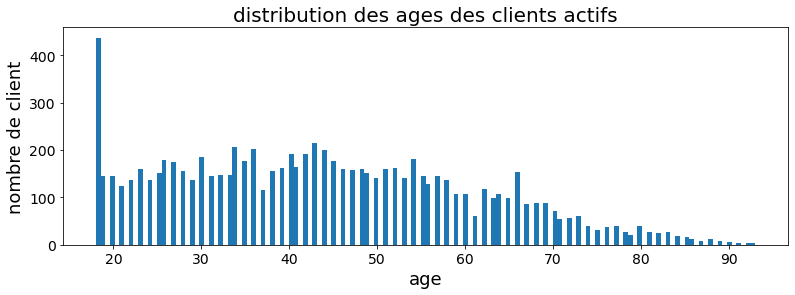

In [78]:
# Distribution des ages des clients actifs sur la periode
fig = plt.figure(figsize=(13,4))
plt.hist([data_client_actifs.age], bins=140)
plt.title("distribution des ages des clients actifs",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("age",fontsize=18)
plt.ylabel("nombre de client",fontsize=18)
plt.show()
fig.savefig('./GRAPHIQUES/analyse_generale/distribution_des_ages_des_clients_actifs.png',dpi=fig.dpi*10)
plt.close(fig)

In [79]:
data_age = data_client_actifs.age
data_age.head()

0    55.0
1    52.0
2    44.0
3    33.0
4    33.0
Name: age, dtype: float64

In [80]:
data_age= pd.DataFrame(data_age.value_counts()).reset_index()
data_age= data_age.sort_values(by='index',ascending=True)
data_age.columns = ['age','Nombre de clients']
data_age.to_csv("./DATA/cleaned/data_age.csv")
data_age.head()

,age,Nombre de clients
0,18.0,437
31,19.0,145
30,20.0,145
40,21.0,125
38,22.0,136


In [81]:
data_age.describe()

,age,Nombre de clients
count,76.000000,76.000000
mean,55.500000,113.157895
std,22.083176,73.704645
min,18.000000,3.000000
25%,36.750000,39.750000
50%,55.500000,136.000000
75%,74.250000,159.250000
max,93.000000,437.000000


<div class="alert alert-block alert-info">
<br>La moyenne d'age des clients actif est de 55 ans , et 50% des clients ont moins de 55 ans.</br>
<br>Le client actif le plus jeune a 18 ans , et le plus agé a 93 ans.</br>

</div>


### <a id="242">2- D- b- meilleurs clients sur la periode d exercice</a>

In [82]:
CA_client = data.groupby("client_id").sum()['price']
CA_client = pd.DataFrame(CA_client)
CA_client = CA_client.sort_values(by='price',ascending = False)
CA_client.head(10)

,price
client_id,
c_1609,324033.35
c_4958,289760.34
c_6714,153658.86
c_3454,113667.90
c_3263,5276.87
c_1570,5271.62
c_2899,5214.05
c_2140,5208.82
c_7319,5155.77


<div class="alert alert-block alert-info">
<br>Ci-dessus les 10 meilleurs clients avec en tête le client c_1609.</br>

</div>

### <a id="243">2- D- c- les clients inactifs sur la periode</a>

In [83]:
data_Paniers = pd.read_csv('./DATA/cleaned/data_Paniers.csv')
data_Paniers.head()

,session_id,montant_dupanier,nombre_article,client_id,age,birth,sex,month,day,date
0,s_1,11.99,1,c_329,55.0,1967.0,f,2021-03,2021-03-01,2021-03-01 00:01:07.843138
1,s_10,26.99,1,c_2218,52.0,1970.0,f,2021-03,2021-03-01,2021-03-01 00:10:33.163037
2,s_100,33.72,2,c_3854,44.0,1978.0,f,2021-03,2021-03-01,2021-03-01 04:12:43.572994
3,s_1000,39.22,4,c_1014,33.0,1989.0,m,2021-03,2021-03-03,2021-03-03 02:38:09.568389
4,s_10000,41.49,3,c_476,33.0,1989.0,f,2021-03,2021-03-22,2021-03-22 17:46:05.819130


In [84]:
clients_actifs = data_Paniers['client_id'].unique()
clients_actifs = pd.DataFrame(clients_actifs)
clients_actifs.columns = ['client_id']
clients_actifs.head()

,client_id
0,c_329
1,c_2218
2,c_3854
3,c_1014
4,c_476


In [85]:
print('nombre de clients actifs:',len(clients_actifs.client_id.unique()))
print('nombre de clients dans la base de données:',len(customers_clean))
print("TAUX D'ATTRITION (%):",(len(customers_clean) - len(clients_actifs.client_id.unique()) )*100/ len(customers_clean))

nombre de clients actifs: 8600
nombre de clients dans la base de données: 8621
TAUX D'ATTRITION (%): 0.24359123071569425


In [86]:
clients_inactifs = customers_clean[~customers_clean.client_id.isin(clients_actifs.client_id.unique())]
clients_inactifs = clients_inactifs.loc[:,{'client_id','sex','birth','age'}]
clients_inactifs=pd.DataFrame(clients_inactifs,)
clients_inactifs=clients_inactifs.reset_index()[["age","client_id","sex","birth"]]
print('Liste des clients inactifs')
clients_inactifs

Liste des clients inactifs


,age,client_id,sex,birth
0,21.0,c_8253,f,2001.0
1,25.0,c_3789,f,1997.0
2,24.0,c_4406,f,1998.0
3,55.0,c_2706,f,1967.0
4,63.0,c_3443,m,1959.0
5,66.0,c_4447,m,1956.0
6,30.0,c_3017,f,1992.0
7,30.0,c_4086,f,1992.0
8,18.0,c_6930,m,2004.0
9,23.0,c_4358,m,1999.0


<div class="alert alert-block alert-info">
<br>Le taux d'attrition est de 0.2435 %  .</br>
<br>Neanmoins , il est important de chercher à reconquerir ces 21 clients qui ont été inactifs cette periode , dont la liste est presentée ci-dessus.</br>
</div>


### <a id="244">2- D- d- concentration des chiffres d'affaire par clients</a>

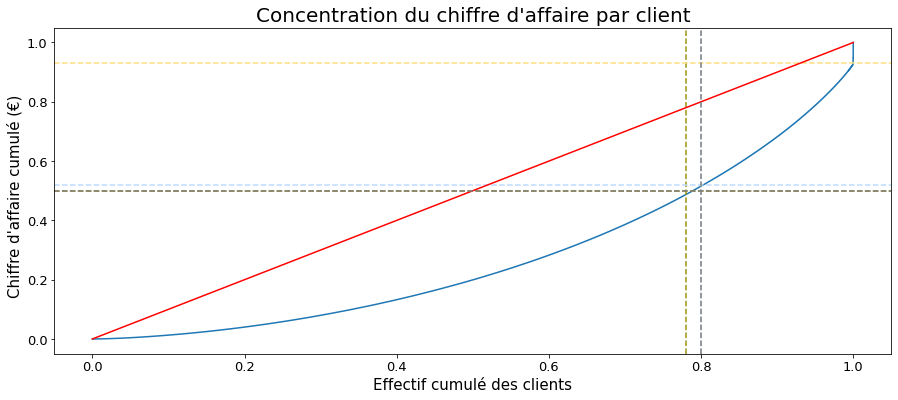

In [87]:
fig = plt.figure(figsize=(15,6))
pan = CA_client['price'].values
lorenz = np.cumsum(np.sort(pan)) / pan.sum()
lorenz = np.append([0],lorenz) #
plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
#----------------lignes---------------------------- 
plt.axhline(y=0.5,color='#99920F',linestyle='--')
plt.axvline(x=0.78,color='#99920F',linestyle='--')
plt.axvline(x=0.8,color='#BFDBFF',linestyle='--')
plt.axhline(y=0.52,color='#BFDBFF',linestyle='--')
plt.axhline(y=0.93,color='#FFDF80',linestyle='--')
plt.plot([0.0, 1], [0.0, 1], 'r-')


plt.axhline(y=0.5,color='gray',linestyle='--')
plt.axvline(x=0.8,color='gray',linestyle='--')
#-----------------------------------------
plt.title("Concentration du chiffre d'affaire par client",fontsize=20)
plt.ylabel("Chiffre d'affaire cumulé (€)  ",fontsize=15)
plt.xlabel('Effectif cumulé des clients',fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

plt.show()
fig.savefig('./GRAPHIQUES/analyse_generale/Concentration_du_chiffre_d_affaire_par_client.png',dpi=fig.dpi*10)
plt.close(fig)

In [88]:
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # 
S = 0.5 - aire_ss_courbe # 
gini = 2*S
gini

0.44657553467067834

In [89]:
print('Les quatre plus gros clients')
CA_client.head(4)

Les quatre plus gros clients


,price
client_id,
c_1609,324033.35
c_4958,289760.34
c_6714,153658.86
c_3454,113667.90


In [90]:
CA_client.head(4).sum()

price    881120.45
dtype: float64

In [91]:
(CA_client.head(4).sum() / CA.sum() ) * 100

price    7.431892
dtype: float64

<div class="alert alert-block alert-info">
<br>En observant la concentration du chiffre d'affaire à travers cette courbe de lorentz on voit que 20% des meilleurs clients produisent 48% du chiffre d'affaire .
</br> 
<br>Le petit segment vertical tout au dessus de la courbe montre qu'une infime partie des clients produisent 7.43 % du chiffre d'affaire soit 881120.45 €.
</br>

</div>

### MERCI DE VOTRE ATTENTION                                                                                                           


##### [HAUT DE PAGE](#100)_